In [1]:
import keras
import pandas as pd
from keras.layers import Dense, Dropout
import matplotlib.pyplot as plt
from keras.models import Sequential
from tensorflow.keras.layers import LSTM
from keras.utils import to_categorical
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.optimizers import Adam
from imblearn.over_sampling import SMOTE
from keras.layers import LeakyReLU
from sklearn.preprocessing import StandardScaler
from keras.callbacks import EarlyStopping, ModelCheckpoint

In [2]:
# check version number
import imblearn
print(imblearn.__version__)
1+1

0.7.0


2

In [3]:
data = pd.read_csv("gudbest.csv", delimiter=",")
data.head()
data.tail()


,App,SpG,Off,Rating,Overall rating,BP,FINISHING,CLASS
5373,0.389831,0.391892,0.041667,0.361486,0.619048,0.333333,0.694444,2
5374,0.254237,0.108108,0.000000,0.250000,0.428571,0.333333,0.513889,2
5375,0.118644,0.229730,0.125000,0.209459,0.476190,0.000000,0.652778,2
5376,0.169492,0.162162,0.041667,0.148649,0.595238,0.333333,0.638889,2
5377,0.576271,0.229730,0.125000,0.385135,0.547619,1.000000,0.472222,2


In [4]:
data = data.iloc[:,:].values

In [5]:
x = data[:,:7]
y = data[:,7]
y = pd.get_dummies(y).iloc[:,:].values
y.shape
x.shape

(5378, 7)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
x_val,X_test,y_val,y_test= train_test_split(X_test,y_test, test_size=0.5, random_state=0)

In [7]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE(random_state=42)
X_r,y_r=oversample.fit_resample(X_train,y_train)

C:\Users\user\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass classes=[0 1 2] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


In [8]:
X_r.shape

(8946, 7)

In [9]:
y_r.shape

(8946, 3)

In [10]:
#scaler=StandardScaler()
#x_scaled=scaler.fit_transform(X_train)
#x_test_scaled=scaler.fit_transform(X_test)
#x_scaled

In [11]:
#x_test_scaled

In [12]:
model = Sequential()
model
model.add(Dense(40, input_dim=7, activation = 'relu'))
model.add(Dense(20, activation = 'relu'))
model.add(Dense(20, activation = 'relu'))
model.add(Dense(20, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(3,  activation = 'softmax'))
adam=Adam(lr=0.001)
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])
es=EarlyStopping(monitor='val_loss', mode='min', verbose=0, patience=100,
                 min_delta=0.0001)

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 40)                320       
_________________________________________________________________
dense_1 (Dense)              (None, 20)                820       
_________________________________________________________________
dense_2 (Dense)              (None, 20)                420       
_________________________________________________________________
dense_3 (Dense)              (None, 20)                420       
_________________________________________________________________
dropout (Dropout)            (None, 20)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 3)                 63        
Total params: 2,043
Trainable params: 2,043
Non-trainable params: 0
______________________________________________________

In [14]:
history = model.fit(X_r, y_r, validation_data=(X_test, y_test), epochs=100,batch_size=8)     

Epoch 1/100
1119/1119 [==============================] - 1s 990us/step - loss: 0.6072 - accuracy: 0.7172 - val_loss: 0.3615 - val_accuracy: 0.8513
Epoch 2/100
1119/1119 [==============================] - 1s 834us/step - loss: 0.4407 - accuracy: 0.8093 - val_loss: 0.3892 - val_accuracy: 0.8401
Epoch 3/100
1119/1119 [==============================] - 1s 830us/step - loss: 0.4104 - accuracy: 0.8204 - val_loss: 0.4381 - val_accuracy: 0.7993
Epoch 4/100
1119/1119 [==============================] - 1s 861us/step - loss: 0.4001 - accuracy: 0.8315 - val_loss: 0.3481 - val_accuracy: 0.8457
Epoch 5/100
1119/1119 [==============================] - 1s 774us/step - loss: 0.3857 - accuracy: 0.8350 - val_loss: 0.3754 - val_accuracy: 0.8327
Epoch 6/100
1119/1119 [==============================] - 1s 725us/step - loss: 0.3796 - accuracy: 0.8343 - val_loss: 0.4313 - val_accuracy: 0.8141
Epoch 7/100
1119/1119 [==============================] - 1s 737us/step - loss: 0.3724 - accuracy: 0.8391 - val_loss: 0

1119/1119 [==============================] - 1s 672us/step - loss: 0.2901 - accuracy: 0.8760 - val_loss: 0.4441 - val_accuracy: 0.8234
Epoch 57/100
1119/1119 [==============================] - 1s 720us/step - loss: 0.2869 - accuracy: 0.8783 - val_loss: 0.4529 - val_accuracy: 0.8067
Epoch 58/100
1119/1119 [==============================] - 1s 722us/step - loss: 0.2830 - accuracy: 0.8816 - val_loss: 0.4567 - val_accuracy: 0.7862
Epoch 59/100
1119/1119 [==============================] - 1s 730us/step - loss: 0.2860 - accuracy: 0.8835 - val_loss: 0.4607 - val_accuracy: 0.7918
Epoch 60/100
1119/1119 [==============================] - 1s 743us/step - loss: 0.2862 - accuracy: 0.8779 - val_loss: 0.4268 - val_accuracy: 0.8030
Epoch 61/100
1119/1119 [==============================] - 1s 790us/step - loss: 0.2820 - accuracy: 0.8820 - val_loss: 0.4260 - val_accuracy: 0.8141
Epoch 62/100
1119/1119 [==============================] - 1s 781us/step - loss: 0.2817 - accuracy: 0.8823 - val_loss: 0.4267 

In [15]:
model.evaluate(X_test, y_test)

17/17 [==============================] - 0s 649us/step - loss: 0.4763 - accuracy: 0.8216


[0.4762914180755615, 0.821561336517334]

In [16]:
history.history

{'loss': [0.6071574687957764,
  0.4407016634941101,
  0.4103561043739319,
  0.4001484215259552,
  0.385708212852478,
  0.37962237000465393,
  0.3724353611469269,
  0.3765602111816406,
  0.3723817765712738,
  0.36967796087265015,
  0.3666486144065857,
  0.35980674624443054,
  0.36114662885665894,
  0.3631766140460968,
  0.3551481068134308,
  0.3548682630062103,
  0.35562676191329956,
  0.3532271981239319,
  0.34831973910331726,
  0.34682169556617737,
  0.33961954712867737,
  0.3456314504146576,
  0.33997517824172974,
  0.34009063243865967,
  0.33474165201187134,
  0.3366575539112091,
  0.33454611897468567,
  0.32970619201660156,
  0.3266857862472534,
  0.32432040572166443,
  0.32668188214302063,
  0.31998664140701294,
  0.3156780004501343,
  0.31753090023994446,
  0.315813809633255,
  0.3192528784275055,
  0.31386399269104004,
  0.3079718351364136,
  0.31054529547691345,
  0.31048348546028137,
  0.3075334429740906,
  0.3052581250667572,
  0.3012678623199463,
  0.3055965006351471,
  0.30

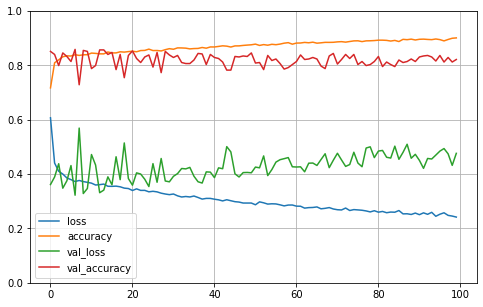

In [17]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

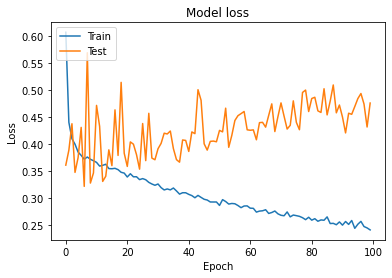

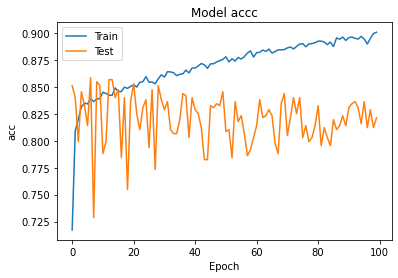

In [18]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accc')
plt.ylabel('acc')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

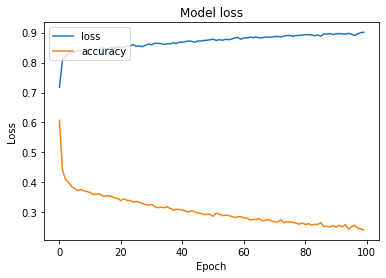

In [19]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['loss', 'accuracy'], loc='upper left')
plt.show()

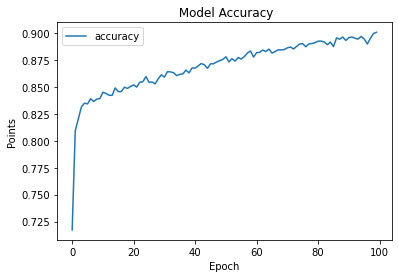

In [20]:
plt.plot(history.history['accuracy'])
plt.title(' Model Accuracy')
plt.ylabel('Points')
plt.xlabel('Epoch')
plt.legend(['accuracy'], loc='upper left')
plt.show()

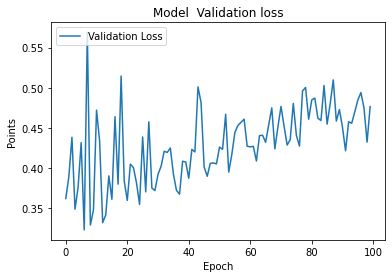

In [21]:
plt.plot(history.history['val_loss'])
plt.title('Model  Validation loss')
plt.ylabel('Points')
plt.xlabel('Epoch')
plt.legend(['Validation Loss'], loc='upper left')
plt.show()

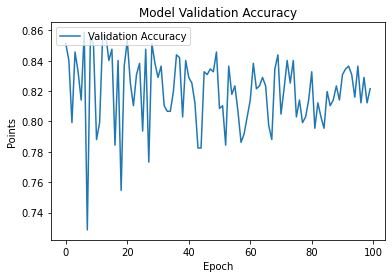

In [22]:
plt.plot(history.history['val_accuracy'])
plt.title('Model Validation Accuracy')
plt.ylabel('Points')
plt.xlabel('Epoch')
plt.legend(['Validation Accuracy'], loc='upper left')
plt.show()

In [23]:
model.evaluate(X_test, y_test)

17/17 [==============================] - 0s 1ms/step - loss: 0.5051 - accuracy: 0.8253


[0.5051482915878296, 0.8252788186073303]

In [24]:
#model.save('weights.h5')

In [25]:
1+1

2